In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA


In [3]:
# Cell 2: Load dataset
# (Download diabetes.csv from Kaggle and keep it in your working directory)
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Cell 3: Dataset info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())


Dataset shape: (768, 9)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']

Missing values per column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [5]:
# Cell 4: Splitting features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (768, 8)
Target shape: (768,)


In [6]:
# Cell 5: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled feature shape:", X_scaled.shape)

Scaled feature shape: (768, 8)


In [7]:
# Cell 6: Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)
print("KPCA shape:", X_kpca.shape)

KPCA shape: (768, 2)


In [8]:
# Cell 7: Store KPCA results in DataFrame
df_kpca = pd.DataFrame(data=X_kpca, columns=['KPC1', 'KPC2'])
df_kpca["Outcome"] = y.values
df_kpca.head()


,KPC1,KPC2,Outcome
0,0.394996,0.081236,1
1,-0.455110,-0.097237,0
2,0.306238,-0.230483,1
3,-0.544290,-0.045869,0
4,0.265748,0.091407,1


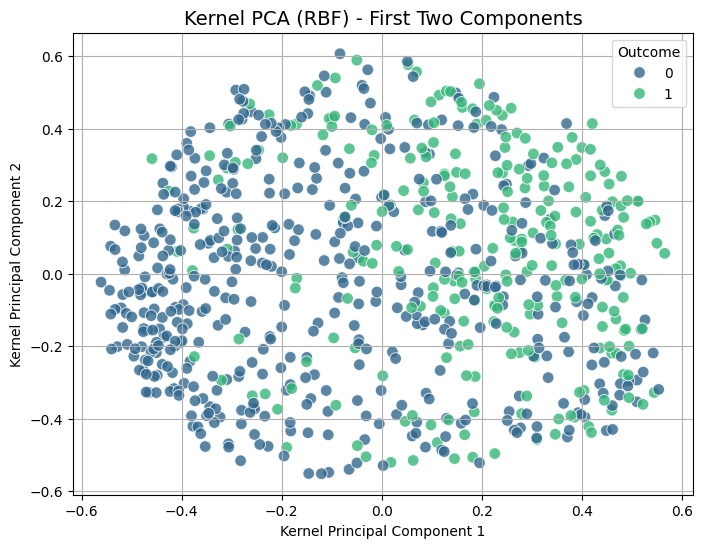

In [9]:
# Cell 8: Scatter plot of Kernel PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="KPC1", 
    y="KPC2", 
    hue="Outcome", 
    data=df_kpca, 
    palette="viridis", 
    s=70, 
    alpha=0.8
)
plt.title("Kernel PCA (RBF) - First Two Components", fontsize=14)
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")
plt.grid(True)
plt.show()
